<center><h2> Ongoing spatial redistribution of a globally stable ocean biological carbon pump </h2></center>
    
<center><h3> Figures </h3></center>

**L. Delaigue<sup>1,3</sup>, R. Sauzède<sup>3</sup>, G-J. Reichart<sup>1,2</sup>, H. Claustre<sup>3</sup>, O. Sulpis<sup>4</sup> and Matthew P. Humphreys<sup>1</sup>**

<sup>1</sup> Department of Ocean Systems (OCS), NIOZ Royal Netherlands Institute for Sea Research, PO Box 59, 1790 AB Den Burg (Texel), the Netherlands  

<sup>2</sup> Department of Earth Sciences, Utrecht University, Utrecht, the Netherlands  

<sup>3</sup> Laboratoire d’Océanographie de Villefranche, Institut de la Mer de Villefranche, 06230 Villefranche-Sur-Mer, France

<sup>4</sup> CEREGE, Aix Marseille Univ, CNRS, IRD, INRAE, Collège de France, Aix-en-Provence, France

## Abstract

The ocean’s dissolved inorganic carbon (DIC) reservoir is a key component of the global carbon cycle and is influenced by atmospheric CO₂ absorption. Over recent decades, DIC has increased due to rising anthropogenic CO₂ (DIC$_{anth}$), while the biological carbon pump’s (BCP) contribution to natural DIC (DIC$_{soft}$) remains less understood. In this study, we reconstructed the global DIC distribution and decomposed it into its components: DIC$_{soft}$, DIC$_{carb}$ (carbonate counter pump contribution), and DIC$_{anth}$. 

Our results show a global DIC increase, with surface waters rising 1.0 ± 0.23 μmol kg$^{-1}$ yr$^{-1}$, primarily driven by DIC$_{anth}$, which accounted for over 90% of the surface increase. The influence of DIC$_{anth}$ diminished with depth, reflecting limited penetration into the ocean interior. In contrast, DIC$_{soft}$ exhibited minimal contribution to the total DIC change on a global scale, remaining within 10% of the total DIC increase. However, significant regional variations in DIC$_{soft}$ were observed. 

These patterns suggest that, while the BCP’s global impact on DIC remained minor due to the balance between organic carbon export and remineralization, climate change may drive a global redistribution of the BCP and lead to significant regional impacts.

**____________________________________________________________________________________________________________________________**


## Figure 1 
### Global mean rates of change in each DIC component as a function of pressure (dbar) within the first 2000m of the water column

This script analyzes the ocean’s **dissolved inorganic carbon (DIC) dynamics** using observational data and a **Monte Carlo simulation** to estimate uncertainties in its decomposition. The workflow includes:

**1. Data Loading & Preprocessing**
- Loads global ocean datasets, including **DIC**, **total alkalinity (TA)**, and **apparent oxygen utilization (AOU)**.
- Computes **absolute salinity**, **potential temperature**, and **density** using GSW equations.

**2. Monte Carlo Simulations**
- Perturbs **DIC, TA, and AOU** within their respective uncertainty ranges.
- Quantifies uncertainty in their long-term trends.

**3. Carbon Pump Contributions**
- Decomposes DIC trends into:
  - **DIC_soft** (biological soft tissue pump contribution)
  - **DIC_carb** (carbonate counter pump contribution)
  - **DIC_anth** (anthropogenic CO₂-driven increase)

**4. Global Mean Computation**
- Computes global trends by applying **weighted averaging** to account for the Earth's geometry.
- Uses **Welford’s online algorithm** to efficiently compute the **mean and variance** of DIC trends without storing all iterations in memory.
- Ensures accurate **error propagation** across Monte Carlo simulations.

**5. Results Export**
- Saves the final dataset, including **uncertainty estimates**, for further analysis.

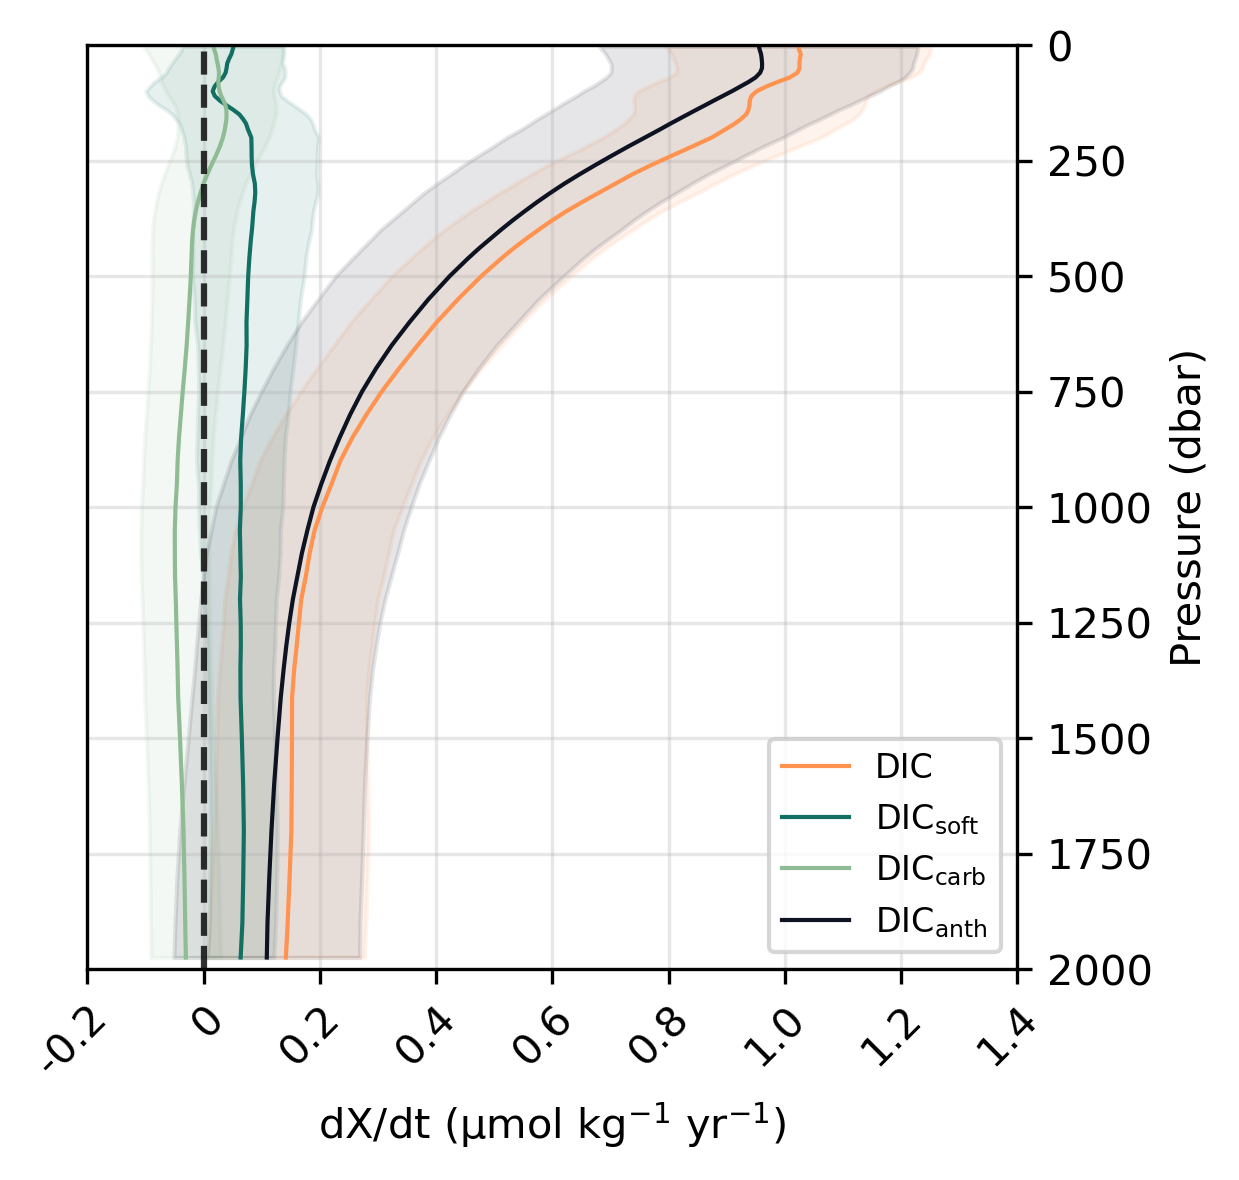

In [15]:
import matplotlib.pyplot as plt
import xarray as xr

# Load dataset
global_mean_ds = xr.load_dataset("data/01_DIC_globally_averaged_change_monte_carlo_online.nc")

# Create a single figure with just ax2
fig, ax2 = plt.subplots(figsize=(4, 4), dpi=300)  # Adjust figure size as needed

# Custom labels and colors
custom_labels = {
    'DIC_rate': 'DIC',
    'soft_pump_aou_change': 'DIC$_{\\mathrm{soft}}$',
    'carb_pump_change': 'DIC$_{\\mathrm{carb}}$',
    'co2_anth_aou_change': 'DIC$_{\\mathrm{anth}}$'
}
custom_colors = {
    'DIC_rate': '#FF934F',
    'soft_pump_aou_change': '#136F63',
    'carb_pump_change': '#8FBC94',
    'co2_anth_aou_change': '#0D1321'
}

legend_handles = []  # To store handles for the legend

# Loop through the data variables to plot each one with custom colors and error bands
for var in ['DIC_rate', 'soft_pump_aou_change', 'carb_pump_change', 'co2_anth_aou_change']:
    data_array = global_mean_ds[var]
    sigma_var = global_mean_ds[f'{var}_uncertainty']  # Constructing the uncertainty variable name

    line, = ax2.plot(data_array, global_mean_ds['pres'], label=custom_labels[var], color=custom_colors[var], linewidth=1)
    ax2.fill_betweenx(global_mean_ds['pres'], data_array - sigma_var, data_array + sigma_var, color=custom_colors[var], alpha=0.1)

    legend_handles.append(line)  # Only add line (not fill_betweenx) to legend

# Set y-axis limits
ax2.set_ylim(2000, 0)  # Keeping pressure in reverse order (oceanographic convention)

# Set x-axis limits and labels
ax2.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4])
ax2.set_xticklabels(['-0.2', '0', '0.2', '0.4', '0.6', '0.8', '1.0', '1.2', '1.4'])

# Rotate x-axis tick labels by 45 degrees
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Set up legend
ax2.legend(legend_handles, [custom_labels[var] for var in custom_labels], loc='lower right', fontsize=8)

# Improve figure
ax2.set_xlabel("dX/dt (μmol kg$^\mathrm{-1}$ yr$^\mathrm{-1})$")
ax2.set_ylabel('Pressure (dbar)')
ax2.grid(alpha=0.3)

# Add subplot label "b)" to the top left
# ax2.text(0.05, 1.07, 'b)', transform=ax2.transAxes, va='top', ha='right')

# Add right y-axis ticks
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")

# Add vertical line at x = 0
ax2.axvline(0, color='black', alpha=0.8, linestyle='--')

# Save and show the figure
plt.savefig('figs/Figure1.png', bbox_inches='tight', dpi=300)
plt.show()


### Statistics

In [82]:
import numpy as np

# Load dataset
global_mean_ds = xr.load_dataset("data/01_DIC_globally_averaged_change_monte_carlo_online.nc")

def round_to_uncertainty(value, uncertainty):
    """Rounds a value to match the significant figures of its uncertainty."""
    if uncertainty == 0:  # Avoid log10 issues if uncertainty is zero
        return value, uncertainty

    # Convert to scientific notation and extract the first significant digit
    sci_notation = f"{uncertainty:.1e}"  # Example: "2.3e-01"
    first_sig_fig = int(sci_notation[0])  # Extract first digit only

    # Determine number of significant figures to keep
    num_sig_figs = 2 if first_sig_fig in [1, 2] else 1

    # Round uncertainty to correct sig figs
    rounded_uncertainty = round(uncertainty, -int(np.floor(np.log10(uncertainty))) + (num_sig_figs - 1))

    # Round value to the same decimal place as rounded uncertainty
    decimal_places = -int(np.floor(np.log10(rounded_uncertainty)))
    rounded_value = round(value, decimal_places)

    return rounded_value, rounded_uncertainty

# Extract max and min values with their uncertainties
max_dic_value = float(global_mean_ds.DIC_rate.max().values)
min_dic_value = float(global_mean_ds.DIC_rate.min().values)
max_dic_uncertainty = float(global_mean_ds.DIC_rate_uncertainty.max().values)
min_dic_uncertainty = float(global_mean_ds.DIC_rate_uncertainty.min().values)

max_co2_anth_value = float(global_mean_ds.co2_anth_aou_change.max().values)
min_co2_anth_value = float(global_mean_ds.co2_anth_aou_change.min().values)
max_co2_anth_uncertainty = float(global_mean_ds.co2_anth_aou_change_uncertainty.max().values)
min_co2_anth_uncertainty = float(global_mean_ds.co2_anth_aou_change_uncertainty.min().values)

# Compute mean `soft_pump_aou_change` in the first 15m
shallow_filter = global_mean_ds.pres <= 15
soft_pump_mean = float(global_mean_ds.soft_pump_aou_change.where(shallow_filter, drop=True).mean().values)
soft_pump_uncertainty_mean = float(global_mean_ds.soft_pump_aou_change_uncertainty.where(shallow_filter, drop=True).mean().values)

# Compute min of `soft_pump_aou_change`
soft_pump_min = float(global_mean_ds.soft_pump_aou_change.min().values)
soft_pump_min_uncertainty = float(global_mean_ds.soft_pump_aou_change_uncertainty.min().values)

# Compute max of `carb_pump_change` and its associated uncertainty
carb_pump_max = float(global_mean_ds.carb_pump_change.max().values)
carb_pump_max_uncertainty = float(global_mean_ds.carb_pump_change_uncertainty.max().values)

# Compute mean `carb_pump_change` below 250m with uncertainty
deep_filter = global_mean_ds.pres > 250
carb_pump_mean_below_250 = float(global_mean_ds.carb_pump_change.where(deep_filter, drop=True).mean().values)
carb_pump_mean_below_250_uncertainty = float(global_mean_ds.carb_pump_change_uncertainty.where(deep_filter, drop=True).mean().values)

# Apply rounding function
dic_max_rounded, dic_max_uncertainty_rounded = round_to_uncertainty(max_dic_value, max_dic_uncertainty)
dic_min_rounded, dic_min_uncertainty_rounded = round_to_uncertainty(min_dic_value, min_dic_uncertainty)

co2_anth_max_rounded, co2_anth_max_uncertainty_rounded = round_to_uncertainty(max_co2_anth_value, max_co2_anth_uncertainty)
co2_anth_min_rounded, co2_anth_min_uncertainty_rounded = round_to_uncertainty(min_co2_anth_value, min_co2_anth_uncertainty)

soft_pump_mean_rounded, soft_pump_uncertainty_rounded = round_to_uncertainty(soft_pump_mean, soft_pump_uncertainty_mean)
soft_pump_min_rounded, soft_pump_min_uncertainty_rounded = round_to_uncertainty(soft_pump_min, soft_pump_min_uncertainty)

carb_pump_max_rounded, carb_pump_max_uncertainty_rounded = round_to_uncertainty(carb_pump_max, carb_pump_max_uncertainty)
carb_pump_mean_below_250_rounded, carb_pump_mean_below_250_uncertainty_rounded = round_to_uncertainty(carb_pump_mean_below_250, carb_pump_mean_below_250_uncertainty)

# Print results with correct significant figures
print(f"Max change in DIC in surface waters: {dic_max_rounded} ± {dic_max_uncertainty_rounded}")
print(f"Min change in DIC in surface waters: {dic_min_rounded} ± {dic_min_uncertainty_rounded}")

print(f"Max change in anthropogenic CO₂ AOU: {co2_anth_max_rounded} ± {co2_anth_max_uncertainty_rounded}")
print(f"Min change in anthropogenic CO₂ AOU: {co2_anth_min_rounded} ± {co2_anth_min_uncertainty_rounded}")

print(f"Mean soft pump AOU change in first 15m: {soft_pump_mean_rounded} ± {soft_pump_uncertainty_rounded}")
print(f"Min soft pump AOU change: {soft_pump_min_rounded} ± {soft_pump_min_uncertainty_rounded}")

print(f"Max carbonate pump change: {carb_pump_max_rounded} ± {carb_pump_max_uncertainty_rounded}")
print(f"Mean carbonate pump change below 250m: {carb_pump_mean_below_250_rounded} ± {carb_pump_mean_below_250_uncertainty_rounded}")


NameError: name 'global_mean_ds' is not defined

**____________________________________________________________________________________________________________________________**


## Figure 2a
### Spatial redistribution of the BCP through depth-integrated (i.e., 0 to 2000m) rates of change in DICsoft across the study period

#### 02_DIC_integrated_change_map_monte_carlo_online_pres_diff

This script performs a **Monte Carlo-based uncertainty analysis** on the **depth-integrated carbon change driven by the soft tissue pump** in the global ocean. The workflow includes:

**1. Data Loading & Preprocessing**
- Loads a global ocean dataset containing **apparent oxygen utilization (AOU)**, **temperature**, **salinity**, and **pressure**.
- Computes **absolute salinity** and **potential temperature** using the **GSW (Gibbs Seawater) library**.
- Uses AOU to estimate the soft tissue pump’s impact on carbon cycling.

**2. Monte Carlo Simulations**
- Runs **1,000 iterations**, perturbing **AOU** based on its uncertainty.
- For each iteration:
  - Computes **linear trends** (per year) for AOU using **polynomial fitting**.
  - Perturbs key parameters associated with the **soft tissue pump** using their uncertainties.

**3. Soft Tissue Pump Contribution to Carbon Cycling**
- Uses **AOU trends** to estimate the **soft tissue pump-driven carbon change**.
- Applies a **stoichiometric ratio** to convert AOU trends into carbon fluxes.
- Computes the **depth-integrated impact of the soft tissue pump on carbon storage**.

**4. Depth Integration of Soft Tissue Pump-Driven Changes**
- Integrates the **soft tissue pump’s contribution over pressure levels** to quantify **depth-integrated carbon changes**.

**5. Uncertainty Quantification & Error Propagation**
- Uses **Welford’s method** to iteratively compute the **mean and variance** of Monte Carlo results.
- Propagates uncertainties across **depth layers**.

**6. Results Export**
- Converts values from **mmol/m²/yr to mol/m²/yr**.
- Saves the final dataset with **depth-integrated soft tissue pump-driven carbon change and uncertainty estimates** for further analysis.


C:\Users\ldelaigue\AppData\Local\Temp\ipykernel_15752\4049253299.py:21: RuntimeWarning: invalid value encountered in divide
  relative_uncertainty = (uncertainty_data / np.abs(dic_nat_total_change_data)) * 100


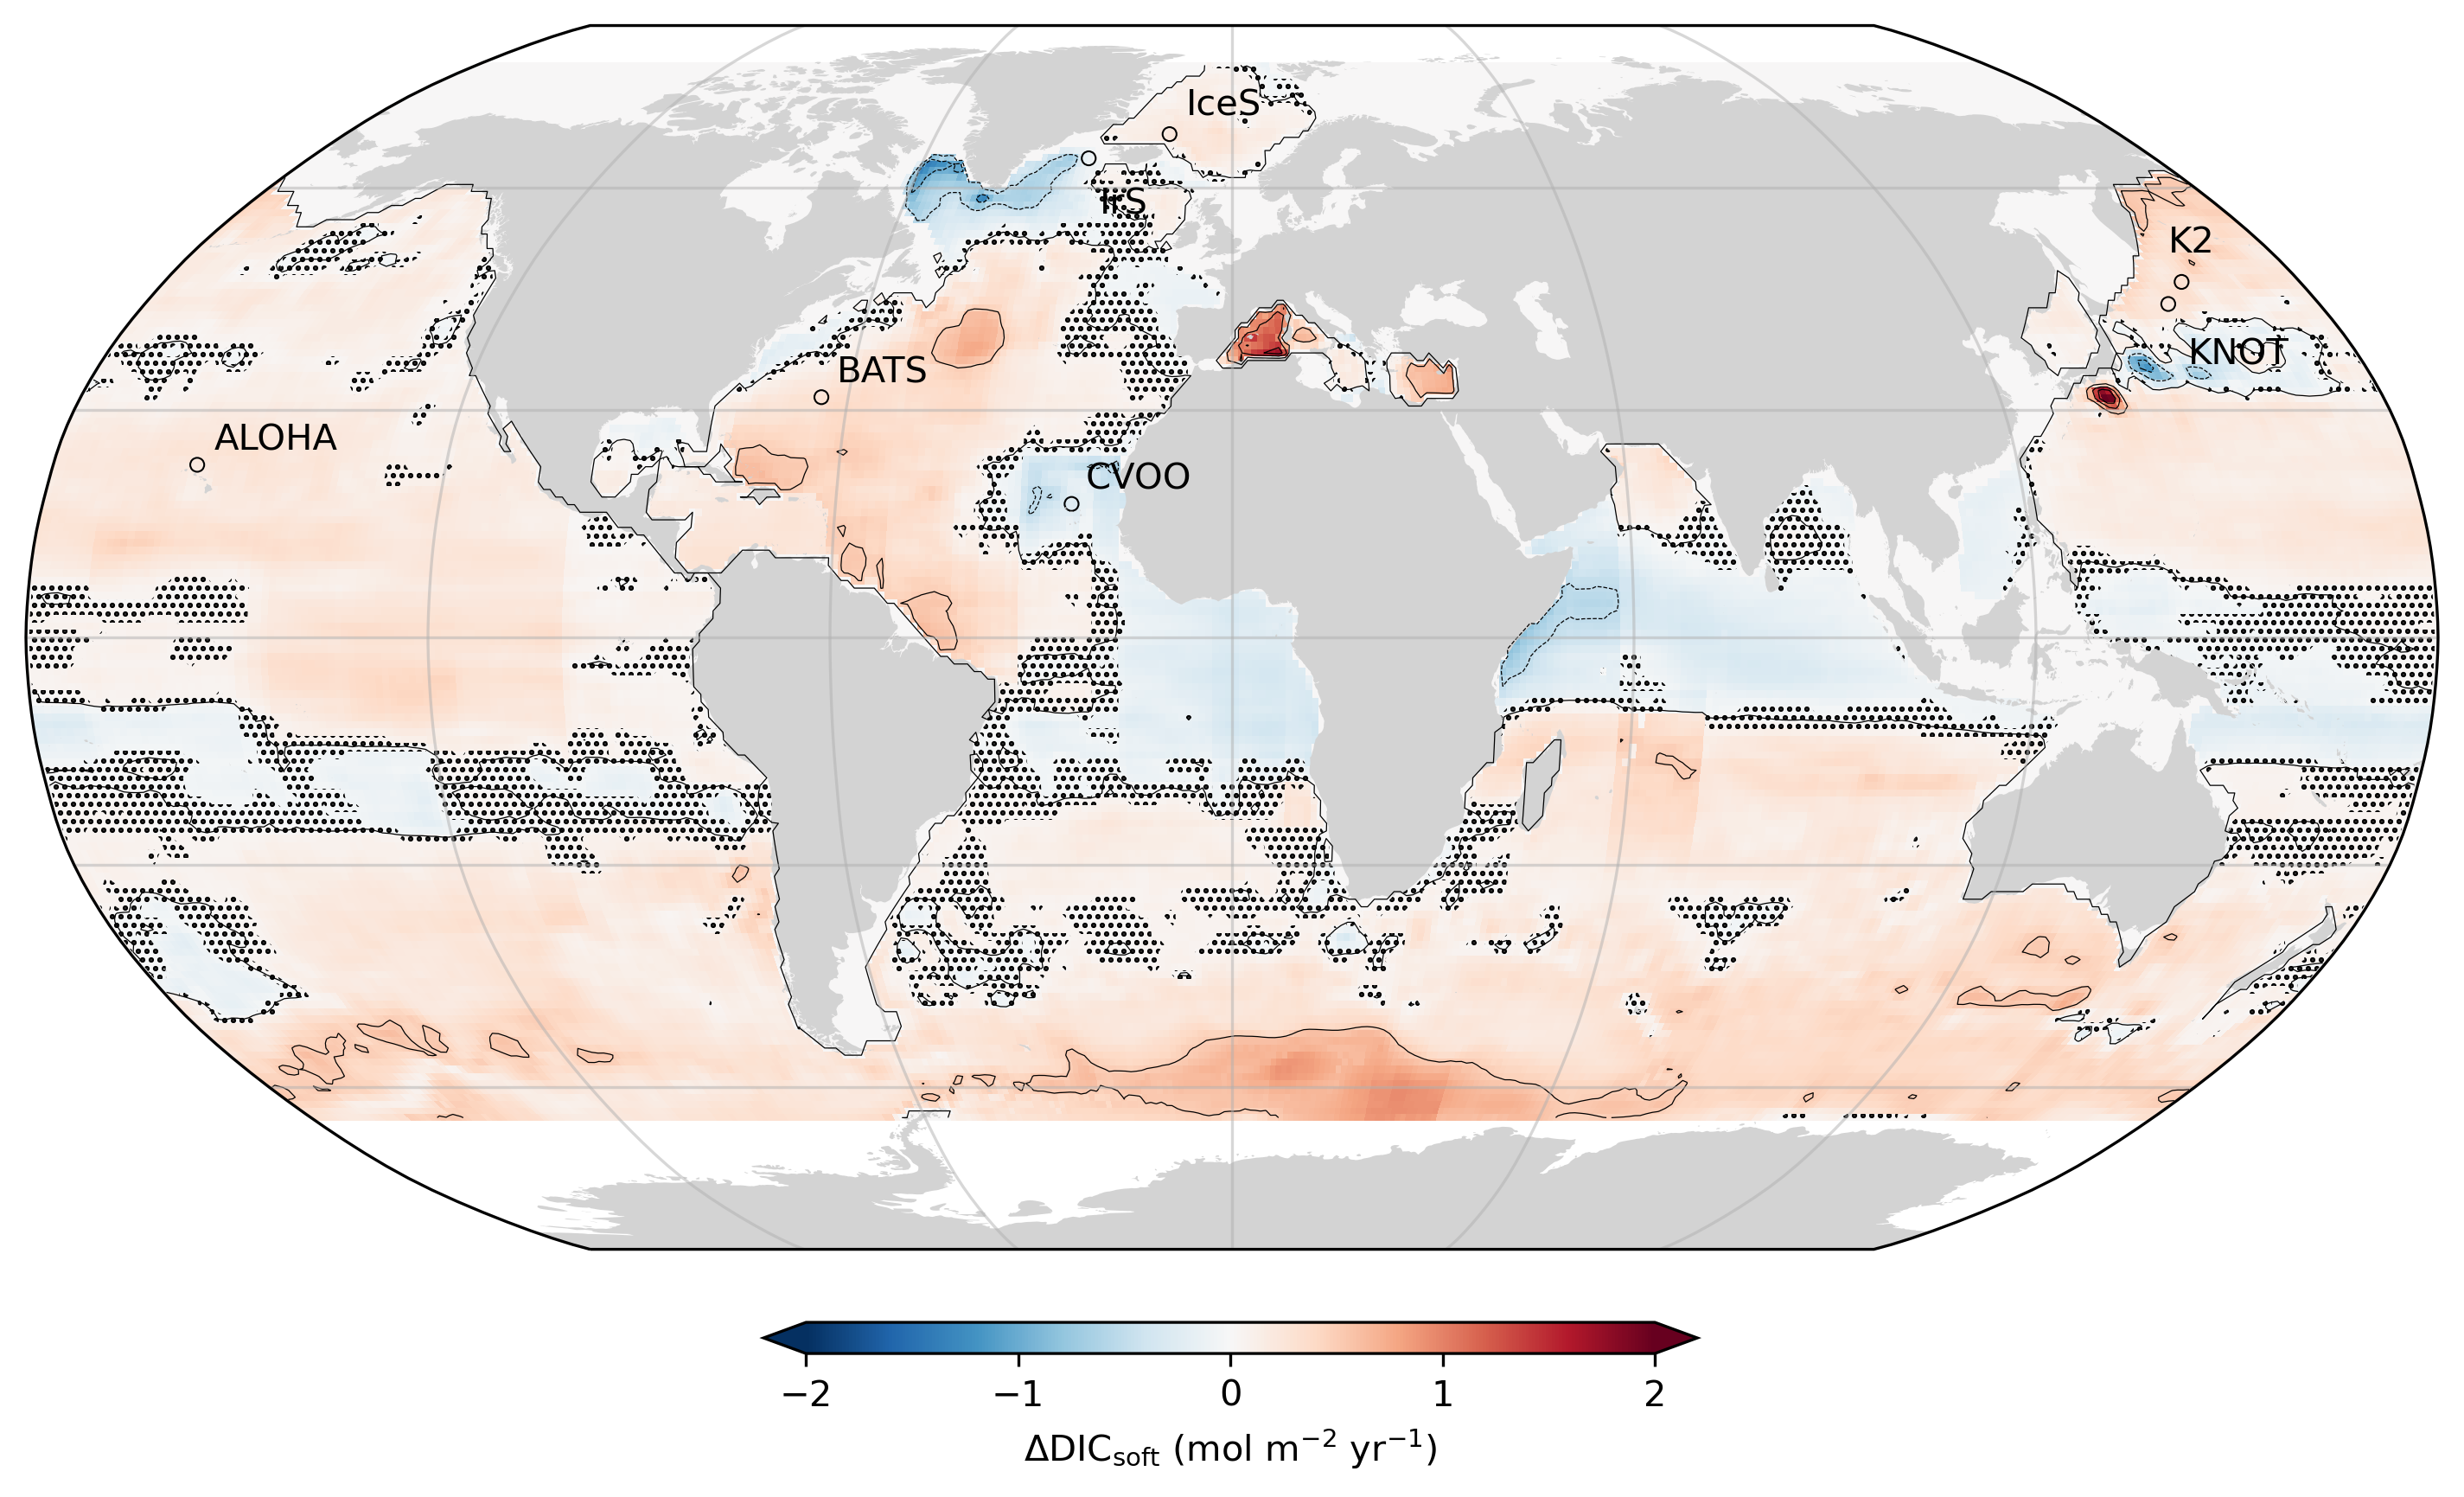

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import TwoSlopeNorm
import xarray as xr

# Load dataset
dic_nat_total_change = xr.load_dataset("data/02_DIC_integrated_change_map_monte_carlo_online_pres_diff.nc")

# Extract coordinates
lon = dic_nat_total_change.coords['lon'].values  # Shape (360,)
lat = dic_nat_total_change.coords['lat'].values  # Shape (145,)
lon_2d, lat_2d = np.meshgrid(lon, lat)  # Shapes: (145, 360)

# Extract data and uncertainty
dic_nat_total_change_data = dic_nat_total_change['soft_pump_aou_change'].values  # Shape (145, 360)
uncertainty_data = dic_nat_total_change['soft_pump_aou_change_uncertainty'].values  # Shape (145, 360)

# Compute relative uncertainty (%)
relative_uncertainty = (uncertainty_data / np.abs(dic_nat_total_change_data)) * 100
relative_uncertainty[np.isnan(relative_uncertainty)] = 0  # Handle division by zero cases

# Define high uncertainty threshold (nth percentile)
threshold = np.percentile(relative_uncertainty, 90)
high_uncertainty_mask = relative_uncertainty > threshold  # Boolean mask

# Normalization parameters
vmin = dic_nat_total_change_data.min()
vmax = dic_nat_total_change_data.max()

# Create figure
fig = plt.figure(figsize=(12, 8), dpi=300)
ax1 = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax1.set_global()

# Add land feature
land_feature = cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='none', facecolor='lightgrey')
ax1.add_feature(land_feature)

# Gridlines
gl1 = ax1.gridlines(draw_labels=False, alpha=0.5)

# Plot ΔDICnat data
norm1 = TwoSlopeNorm(vcenter=0, vmin=-2, vmax=2)
im1 = ax1.pcolormesh(lon_2d, lat_2d, dic_nat_total_change_data, transform=ccrs.PlateCarree(), cmap='RdBu_r', norm=norm1)

# Add high uncertainty hatching
ax1.contourf(lon_2d, lat_2d, high_uncertainty_mask, levels=[0.5, 1], colors='xkcd:grey', hatches=['.....'], alpha=0.001, transform=ccrs.PlateCarree())

# Contour lines
levels = np.arange(-2, 2, 0.5)
contour1 = ax1.contour(lon_2d, lat_2d, dic_nat_total_change_data, levels=levels, colors='black', linewidths=0.3, transform=ccrs.PlateCarree())

# Remove title
ax1.set_title("")

# Colorbar
cbar_ax1 = fig.add_axes([0.362, 0.15, 0.3, 0.015])  # Adjust position if needed
cbar1 = fig.colorbar(im1, cax=cbar_ax1, orientation='horizontal', extend='both')
cbar1.set_label(r'$\Delta$DIC$_{\mathrm{soft}}$ (mol m$^{-2}$ yr$^{-1}$)')

# Add time series locations
time_series_locations = [
    (-158.002237, 22.752951, 'ALOHA', 2, 2),
    (-64.189528, 31.665369, 'BATS', 2, 2),
    (-24.278775, 17.594396, 'CVOO', 2, 2),
    (-12.670897, 67.996233, 'IceS', 3, 3),
    (-27.955002, 64.335978, 'IrS', 4, -8),
    (160.050667, 46.968458, 'K2', 2, 4),
    (154.998005, 44.003165, 'KNOT', -3, -8)
]

for x, y, label, x_offset, y_offset in time_series_locations:
    ax1.text(x + x_offset, y + y_offset, label, transform=ccrs.Geodetic(), fontsize=10)
    ax1.scatter(x, y, edgecolor='black', facecolor='none', linewidths=0.5, transform=ccrs.PlateCarree(), s=15)

# Save figure
fig.savefig('figs/Figure2a_with_uncertainty.png', bbox_inches='tight', dpi=300)
plt.show()


### Statistics with interactive map

In [ ]:
import plotly.graph_objects as go
import xarray as xr
import numpy as np

# Load dataset
ds = xr.open_dataset('data/02_DIC_integrated_change_map_monte_carlo_online_pres_diff.nc')
var_name = 'soft_pump_aou_change'
uncertainty_var_name = 'soft_pump_aou_change_uncertainty'

lat = ds['lat'].values
lon = ds['lon'].values

data = ds[var_name].values
uncertainty = ds[uncertainty_var_name].values

# Define latitude and longitude ranges 
lat_range = slice(-5, 10)  
lon_range = slice(39.5, 103.5)

# Subset the dataset for the given lat and lon range
subset = ds[var_name].sel(lat=lat_range, lon=lon_range)
uncertainty_subset = ds[uncertainty_var_name].sel(lat=lat_range, lon=lon_range)

# Calculate mean, min, and max values along with uncertainties
mean_value = subset.mean().values
mean_uncertainty = np.sqrt((uncertainty_subset ** 2).mean()).values  # Propagate uncertainty

min_value = subset.min().values
max_value = subset.max().values

# Extract uncertainty corresponding to min and max values
min_uncertainty = uncertainty_subset.where(subset == min_value, drop=True).min().values
max_uncertainty = uncertainty_subset.where(subset == max_value, drop=True).max().values

# Function to format values with 2 decimal places
def format_value(value, uncertainty):
    formatted_value = f"{value:.2f}"
    formatted_uncertainty = f"{uncertainty:.2f}"
    return f"{formatted_value} ± {formatted_uncertainty}"

# Print results
print("Statistics within selected area:")
print(f"Mean value: {format_value(mean_value, mean_uncertainty)}")
print(f"Min value: {format_value(min_value, min_uncertainty)}")
print(f"Max value: {format_value(max_value, max_uncertainty)}")

# Create a Plotly figure with a diverging color scale
fig = go.Figure(go.Heatmap(
    z=data,
    x=lon,
    y=lat,
    colorscale='RdBu_r',  # Red for positive, blue for negative
    zmid=0  # Set the midpoint at 0 for normalization
))

# Add a rectangle (square) for the selected lat and lon range
fig.add_trace(go.Scatter(
    x=[lon_range.start, lon_range.stop, lon_range.stop, lon_range.start, lon_range.start],
    y=[lat_range.start, lat_range.start, lat_range.stop, lat_range.stop, lat_range.start],
    mode="lines",
    line=dict(color="black", width=2),
    name="Selected Area"
))

# Update layout
fig.update_layout(
    title="DICnat total change (mol/m2/yr)",
    xaxis_title="Longitude",
    yaxis_title="Latitude"
)

# Show the plot
fig.show()

**____________________________________________________________________________________________________________________________**


## Figure 2b
### Net new DICsoft sequestered below the maximum climatological MLD across the study period

This script performs a **Monte Carlo-based uncertainty analysis** on the **depth-integrated dissolved inorganic carbon (DIC) sequestration below the winter mixed layer depth (MLD)** in the global ocean. The workflow includes:

**1. Data Loading & Preprocessing**
- Loads a global ocean dataset containing **salinity, temperature, oxygen, and pressure**.
- Computes **absolute salinity** and **potential temperature** using the **GSW (Gibbs Seawater) library**.
- Uses **oxygen and temperature data** to estimate **apparent oxygen utilization (AOU)**, a key metric for biological carbon cycling.
- Computes **seawater density** using the **GSW density module**.
- Uses a **stoichiometric ratio** to calculate **DIC from AOU**, representing the contribution of the soft tissue pump.

**2. Mixed Layer Depth (MLD) Data Processing**
- Loads **mixed layer depth (MLD) data** from an external dataset.
- Adjusts **longitude coordinates** to ensure consistency between datasets.
- Interpolates MLD data onto the **same lat/lon grid** as the main dataset.
- Applies an **MLD-based mask**, filtering out data above the mixed layer to focus on **sub-MLD carbon sequestration**.


**3. Monte Carlo Simulations**
- Runs **1,000 iterations**, perturbing **AOU** and **stoichiometric constants** based on their uncertainties.
- For each iteration:
  - Perturbs **AOU** values using **normally distributed noise**.
  - Perturbs the **stoichiometric conversion factor** used for DIC estimation.
  - Computes **DIC changes below the mixed layer** by integrating over depth.
  - Converts values into **mol/m³ and mol/m²**, ensuring proper unit consistency.

**4. Depth-Integrated DIC Sequestration Calculation**
- Computes **pressure layer thickness** and integrates **DIC sequestration per unit area**.
- Accumulates **depth-integrated DIC sequestration** across the full profile.
- Computes **monthly changes** in sequestration over time.

**5. Uncertainty Quantification & Error Propagation**
- Uses **Welford’s method** to iteratively compute the **mean and variance** of Monte Carlo results.
- Propagates uncertainties across **spatial and temporal dimensions**.
- Computes **final standard deviations** after all Monte Carlo iterations are completed.

**6. Final Dataset & Results Export**
- Outputs a dataset containing:
  - **Mean depth-integrated DIC sequestration below the winter MLD**.
  - **Uncertainty (standard deviation) of the sequestration estimates**.
- Saves the final dataset in **NetCDF format** for further analysis.


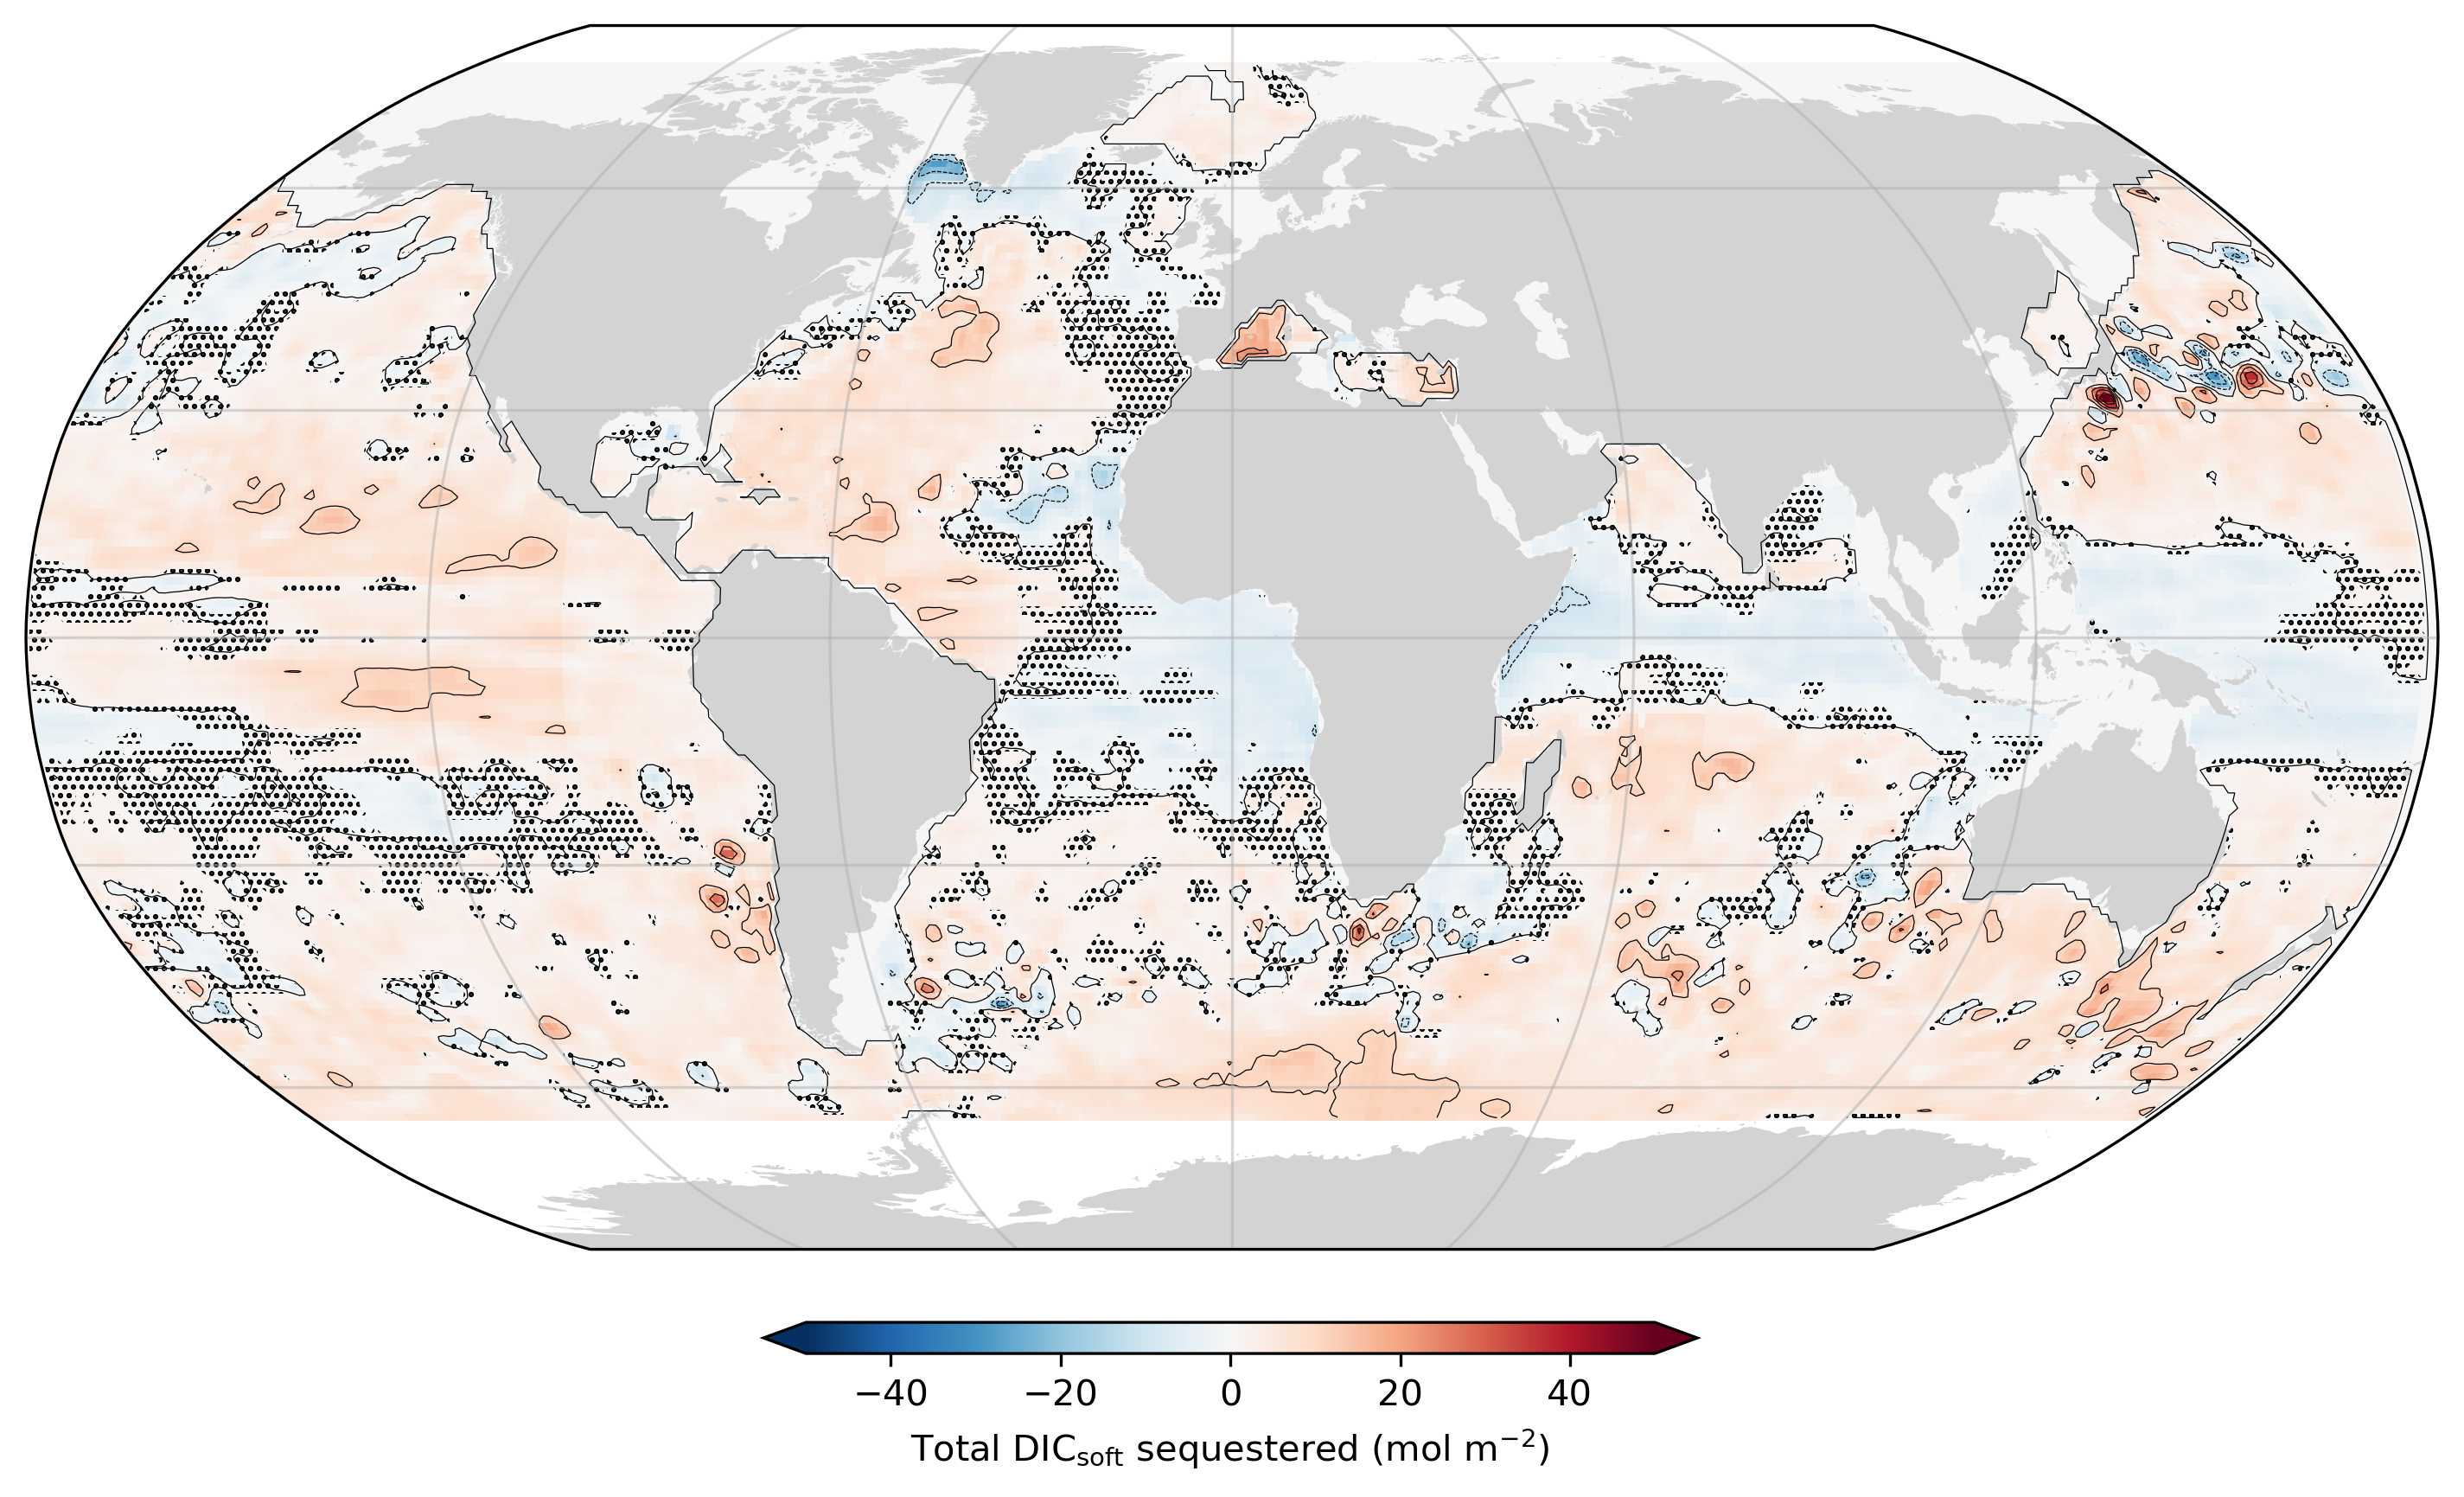

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import TwoSlopeNorm
import xarray as xr

# Load dataset
dic_nat_new_seq = xr.load_dataset("data/03_DIC_sequestration_below_winter_MLD_monte_carlo_online_1000_iterations.nc")

# Extract coordinates
lon = dic_nat_new_seq.coords['lon'].values  # Shape (360,)
lat = dic_nat_new_seq.coords['lat'].values  # Shape (145,)
lon_2d, lat_2d = np.meshgrid(lon, lat)  # Shapes: (145, 360)

# Extract data and uncertainty
dic_nat_new_seq_data = dic_nat_new_seq['DIC_nat_sequestration'].values  # Shape (145, 360)
uncertainty_data = dic_nat_new_seq['DIC_nat_sequestration_uncertainty'].values  # Shape (145, 360)

# Compute relative uncertainty (%)
eps = np.finfo(float).eps  # Smallest positive float number to avoid division by zero
relative_uncertainty = (uncertainty_data / (np.abs(dic_nat_new_seq_data) + eps)) * 100
relative_uncertainty[np.isnan(relative_uncertainty)] = 0  # Handle NaNs

# Define high uncertainty threshold (90th percentile)
threshold = np.percentile(relative_uncertainty, 90)
high_uncertainty_mask = relative_uncertainty > threshold  # Boolean mask

# Normalization parameters
vmin = dic_nat_new_seq_data.min()
vmax = dic_nat_new_seq_data.max()

# Create figure
fig = plt.figure(figsize=(12, 8), dpi=300)
ax1 = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax1.set_global()

# Add land feature
land_feature = cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='none', facecolor='lightgrey')
ax1.add_feature(land_feature)

# Gridlines
gl1 = ax1.gridlines(draw_labels=False, alpha=0.5)

# Plot ΔDICnat data
norm1 = TwoSlopeNorm(vcenter=0, vmin=-50, vmax=50)
im1 = ax1.pcolormesh(lon, lat, dic_nat_new_seq_data, transform=ccrs.PlateCarree(), cmap='RdBu_r', norm=norm1)

# Add high uncertainty hatching
ax1.contourf(lon_2d, lat_2d, high_uncertainty_mask, levels=[0.5, 1], colors='xkcd:grey', hatches=['.....'], alpha=0.001, transform=ccrs.PlateCarree())

# Contour lines
levels = np.arange(-50, 50, 10)
contour1 = ax1.contour(lon_2d, lat_2d, dic_nat_new_seq_data, levels=levels, colors='black', linewidths=0.3, transform=ccrs.PlateCarree())

# Remove title
ax1.set_title("")

# Colorbar
cbar_ax1 = fig.add_axes([0.362, 0.15, 0.3, 0.015])  # Adjust position if needed
cbar1 = fig.colorbar(im1, cax=cbar_ax1, orientation='horizontal', extend='both')
cbar1.set_label(r'Total DIC$_{\mathrm{soft}}$ sequestered (mol m$^{-2}$)')

# Save figure
fig.savefig('figs/Figure2b_with_uncertainty.png', bbox_inches='tight', dpi=300)
plt.show()


### Statistics with interactive plot

**____________________________________________________________________________________________________________________________**


## Figure 2

C:\Users\ldelaigue\AppData\Local\Temp\ipykernel_17128\1594599630.py:26: RuntimeWarning: invalid value encountered in divide
  relative_uncertainty = (uncertainty_data / np.abs(dic_nat_total_change_data)) * 100


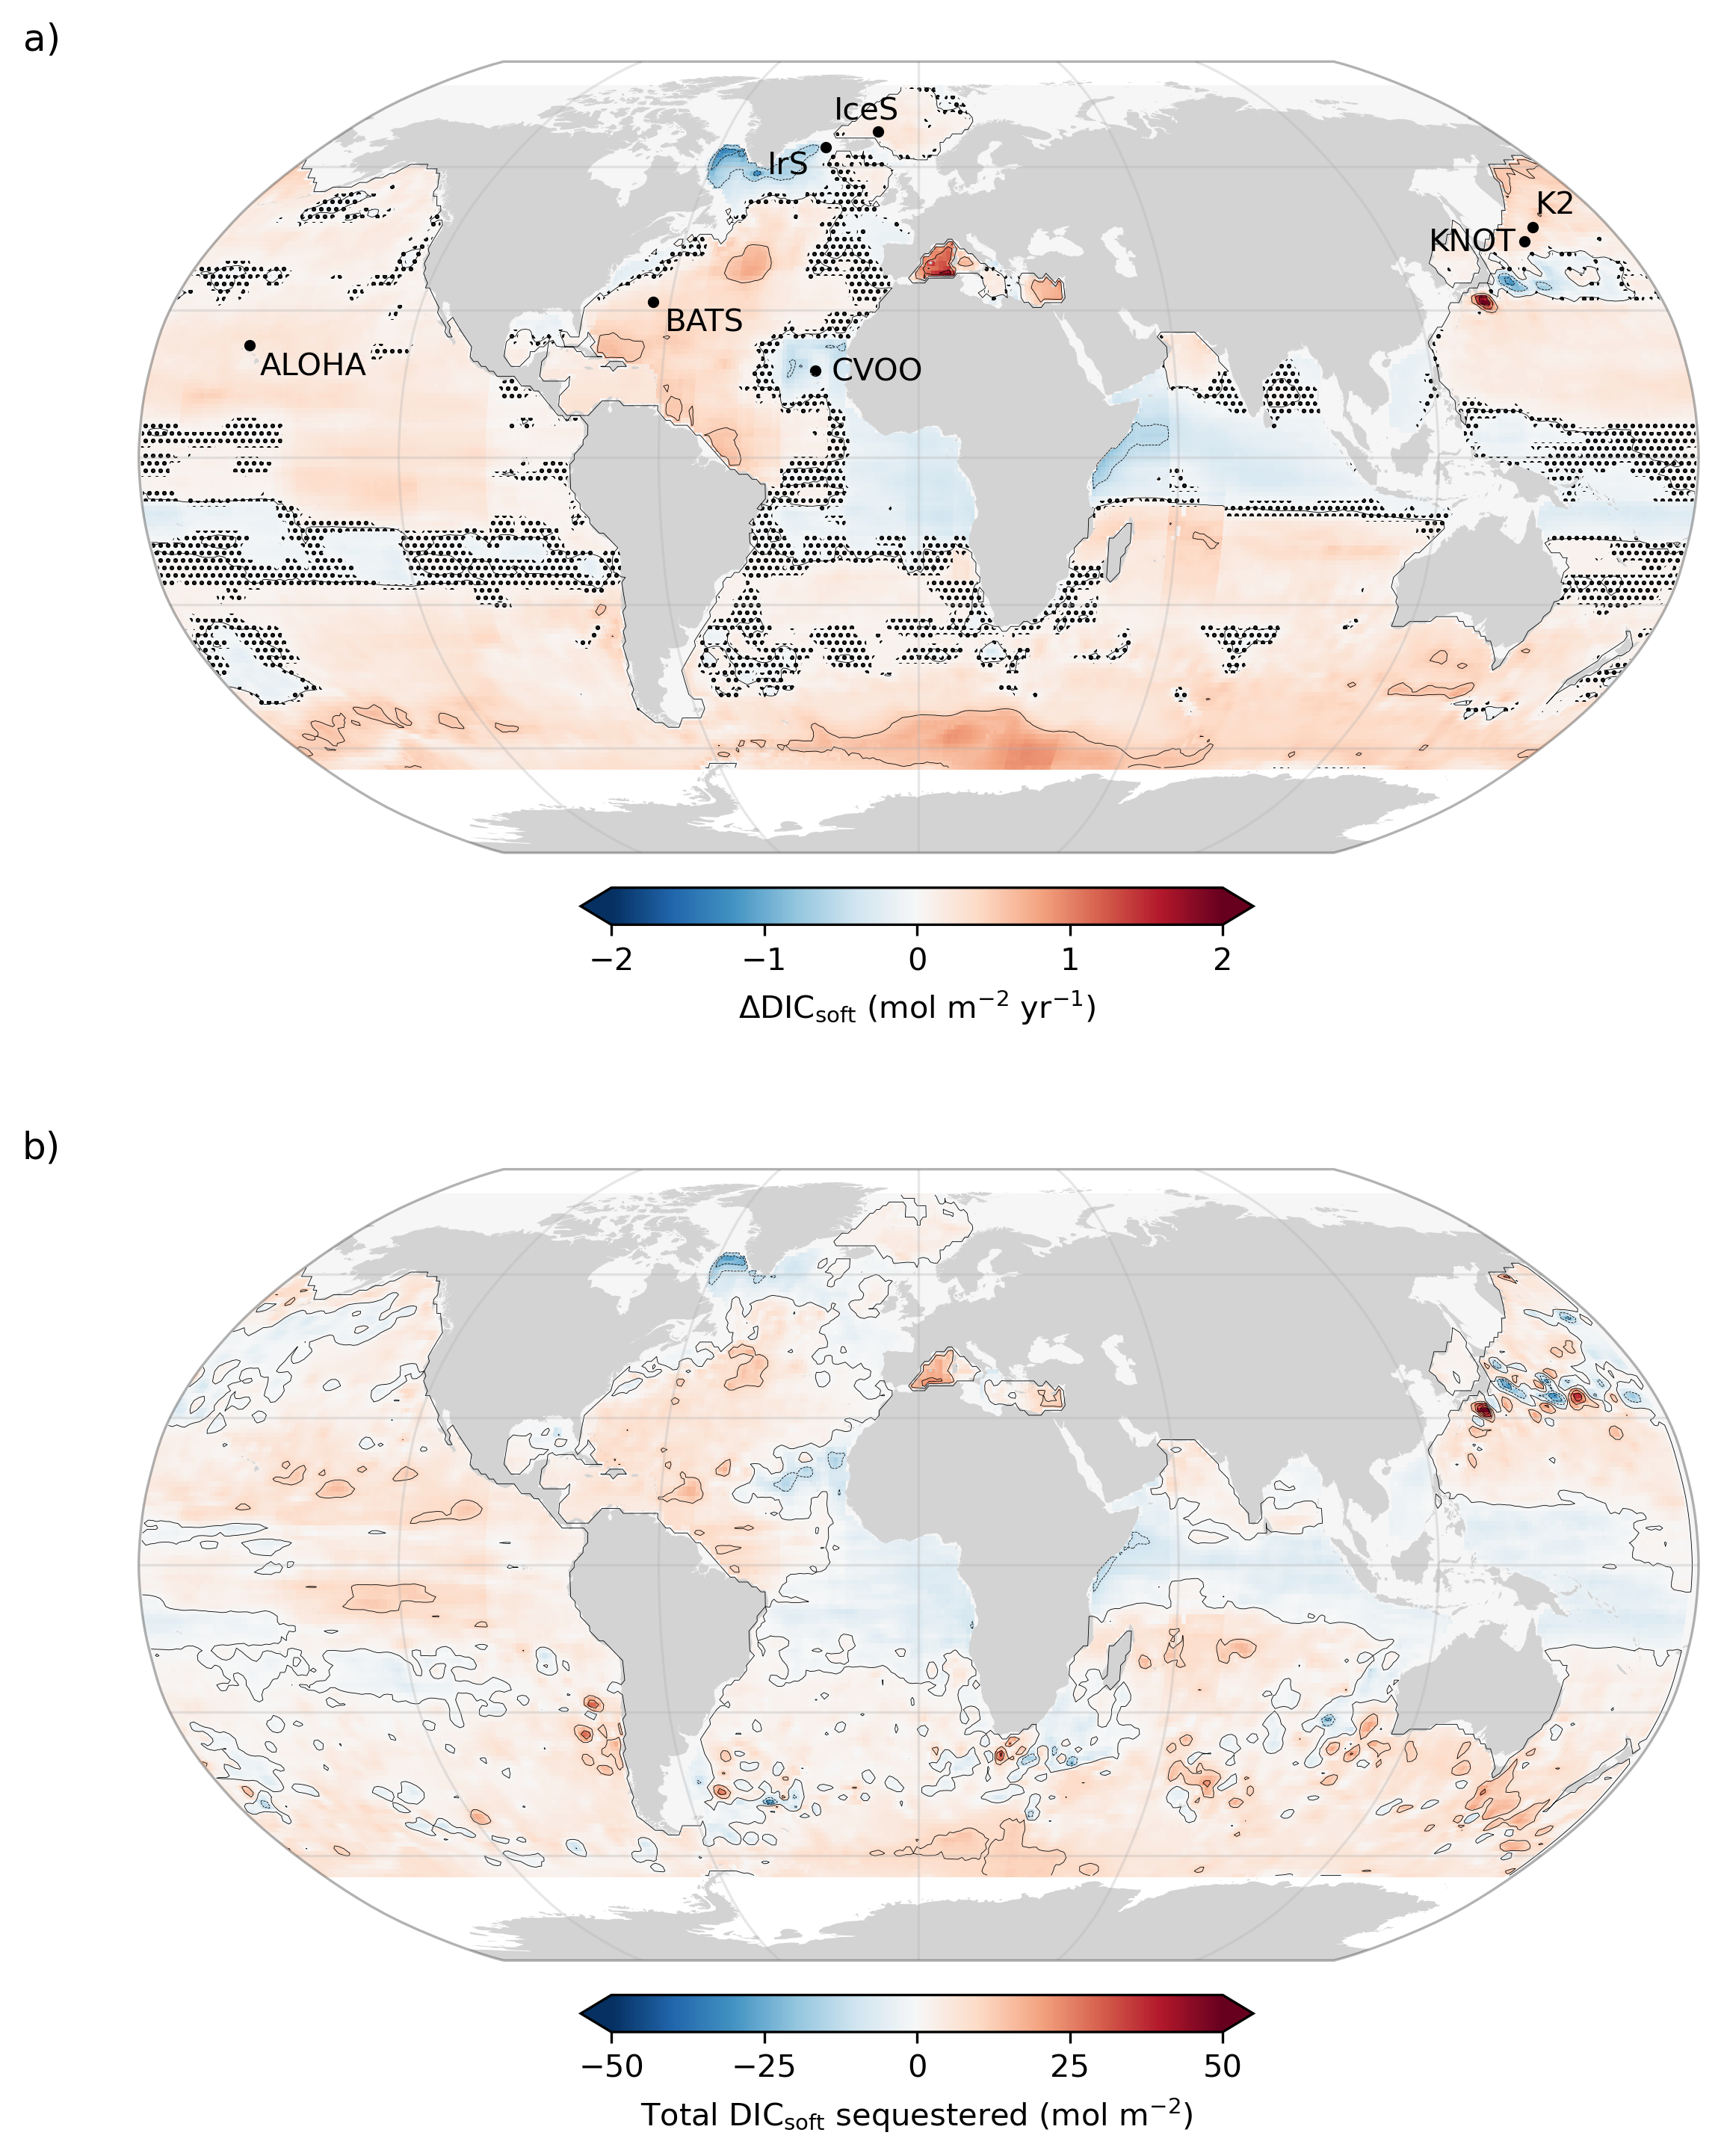

In [8]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import TwoSlopeNorm

# Load datasets
dic_nat_total_change = xr.open_dataset('data/02_DIC_integrated_change_map_monte_carlo_online_pres_diff.nc')
net_DIC_sequestration = xr.load_dataset('data/03_DIC_sequestration_below_winter_MLD_monte_carlo_online_1000_iterations.nc')

# Extract coordinates (lat, lon)
lon = dic_nat_total_change.coords['lon'].values
lat = dic_nat_total_change.coords['lat'].values
lon_2d, lat_2d = np.meshgrid(lon, lat)

# Extract data
dic_nat_total_change_data = dic_nat_total_change["soft_pump_aou_change"].values
net_DIC_sequestration_data = net_DIC_sequestration["DIC_nat_sequestration"].values

# Extract uncertainty data
uncertainty_data = dic_nat_total_change["soft_pump_aou_change_uncertainty"].values

# Compute relative uncertainty (%)
relative_uncertainty = (uncertainty_data / np.abs(dic_nat_total_change_data)) * 100
relative_uncertainty[np.isnan(relative_uncertainty)] = 0  # Handle division by zero cases

# Define high uncertainty threshold (90th percentile)
threshold = np.percentile(relative_uncertainty, 90)
high_uncertainty_mask = relative_uncertainty > threshold  # Boolean mask

# Create figure
fig = plt.figure(figsize=(15, 11), dpi=300)

# --- First subplot: dic_nat_total_change ---
ax1 = fig.add_subplot(2, 1, 1, projection=ccrs.Robinson())
ax1.set_global()

# Add land feature
land_feature = cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='none', facecolor='lightgrey')
ax1.add_feature(land_feature)

# Add gridlines
ax1.gridlines(draw_labels=False, alpha=0.3)

# Add subplot label
ax1.text(-0.05, 1.05, 'a)', transform=ax1.transAxes, fontsize=12, va='top', ha='right')

# Plot ΔDICnat data
norm1 = TwoSlopeNorm(vcenter=0, vmin=-2, vmax=2)
im1 = ax1.pcolormesh(lon_2d, lat_2d, dic_nat_total_change_data, transform=ccrs.PlateCarree(), cmap='RdBu_r', norm=norm1)

# Add uncertainty hatching
ax1.contourf(lon_2d, lat_2d, high_uncertainty_mask, levels=[0.5, 1], colors='xkcd:pale grey', hatches=['.....'], alpha=0.001, transform=ccrs.PlateCarree())

# Add contour lines
levels = np.arange(-2, 2, 0.5)
ax1.contour(lon_2d, lat_2d, dic_nat_total_change_data, levels=levels, colors='black', linewidths=0.2, transform=ccrs.PlateCarree())

# Add colorbar
cbar_ax1 = fig.add_axes([0.412, 0.53, 0.2, 0.015])
cbar1 = fig.colorbar(im1, cax=cbar_ax1, orientation='horizontal', extend='both')
cbar1.set_label(r'$\Delta$DIC$_{\mathrm{soft}}$ (mol m$^{-2}$ yr$^{-1}$)')

# Add time series locations
time_series_locations = [
    (-158.002237, 22.752951, 'ALOHA', 4, -6),
    (-64.189528, 31.665369, 'BATS', 4, -6),
    (-24.278775, 17.594396, 'CVOO', 4, -2),
    (-12.670897, 67.996233, 'IceS', -15, 3),
    (-27.955002, 64.335978, 'IrS', -15, -6),
    (160.050667, 46.968458, 'K2', 4, 3),
    (154.998005, 44.003165, 'KNOT', -26, -2)
]

for x, y, label, x_offset, y_offset in time_series_locations:
    ax1.text(x + x_offset, y + y_offset, label, transform=ccrs.Geodetic(), fontsize=10)
    ax1.scatter(x, y, edgecolor='black', facecolor='black', linewidths=0.5, transform=ccrs.PlateCarree(), s=10)

# Adjust the transparency of the frame around the first plot
for spine in ax1.spines.values():
    spine.set_alpha(0.3)
    
# --- Second subplot: net_DIC_sequestration ---
ax2 = fig.add_subplot(2, 1, 2, projection=ccrs.Robinson())
ax2.set_global()

# Add land features
ax2.add_feature(land_feature)

# Add gridlines
ax2.gridlines(draw_labels=False, alpha=0.3)

# Add subplot label
ax2.text(-0.05, 1.05, 'b)', transform=ax2.transAxes, fontsize=12, va='top', ha='right')

# Plot data
norm2 = mcolors.TwoSlopeNorm(vmin=-50, vcenter=0, vmax=50)
im2 = ax2.pcolormesh(lon_2d, lat_2d, net_DIC_sequestration_data, transform=ccrs.PlateCarree(), cmap='RdBu_r', norm=norm2)

# Add contour lines
levels = np.arange(-50, 50, 10)
ax2.contour(lon_2d, lat_2d, net_DIC_sequestration_data, levels=levels, colors='black', linewidths=0.2, transform=ccrs.PlateCarree())

# Add colorbar
cbar_ax2 = fig.add_axes([0.412, 0.081, 0.2, 0.015])
cbar2 = fig.colorbar(im2, cax=cbar_ax2, orientation='horizontal', extend='both')
cbar2.set_label(r'Total DIC$_{\mathrm{soft}}$ sequestered (mol m$^{-2}$)')
cbar2.set_ticks([50, 25, 0, -25, -50])

# Adjust the transparency of the frame around the second plot
for spine in ax2.spines.values():
    spine.set_alpha(0.3)

# Adjust layout
plt.subplots_adjust(hspace=0.4)

# Save figure
fig.savefig('figs/Figure2_with_uncertainty.png', bbox_inches='tight', dpi=300)
plt.show()


C:\Users\ldelaigue\AppData\Local\Temp\ipykernel_17128\843068170.py:27: RuntimeWarning: invalid value encountered in divide
  relative_uncertainty_1 = (uncertainty_data_1 / np.abs(dic_nat_total_change_data)) * 100
C:\Users\ldelaigue\AppData\Local\Temp\ipykernel_17128\843068170.py:30: RuntimeWarning: invalid value encountered in divide
  relative_uncertainty_2 = (uncertainty_data_2 / np.abs(net_DIC_sequestration_data)) * 100


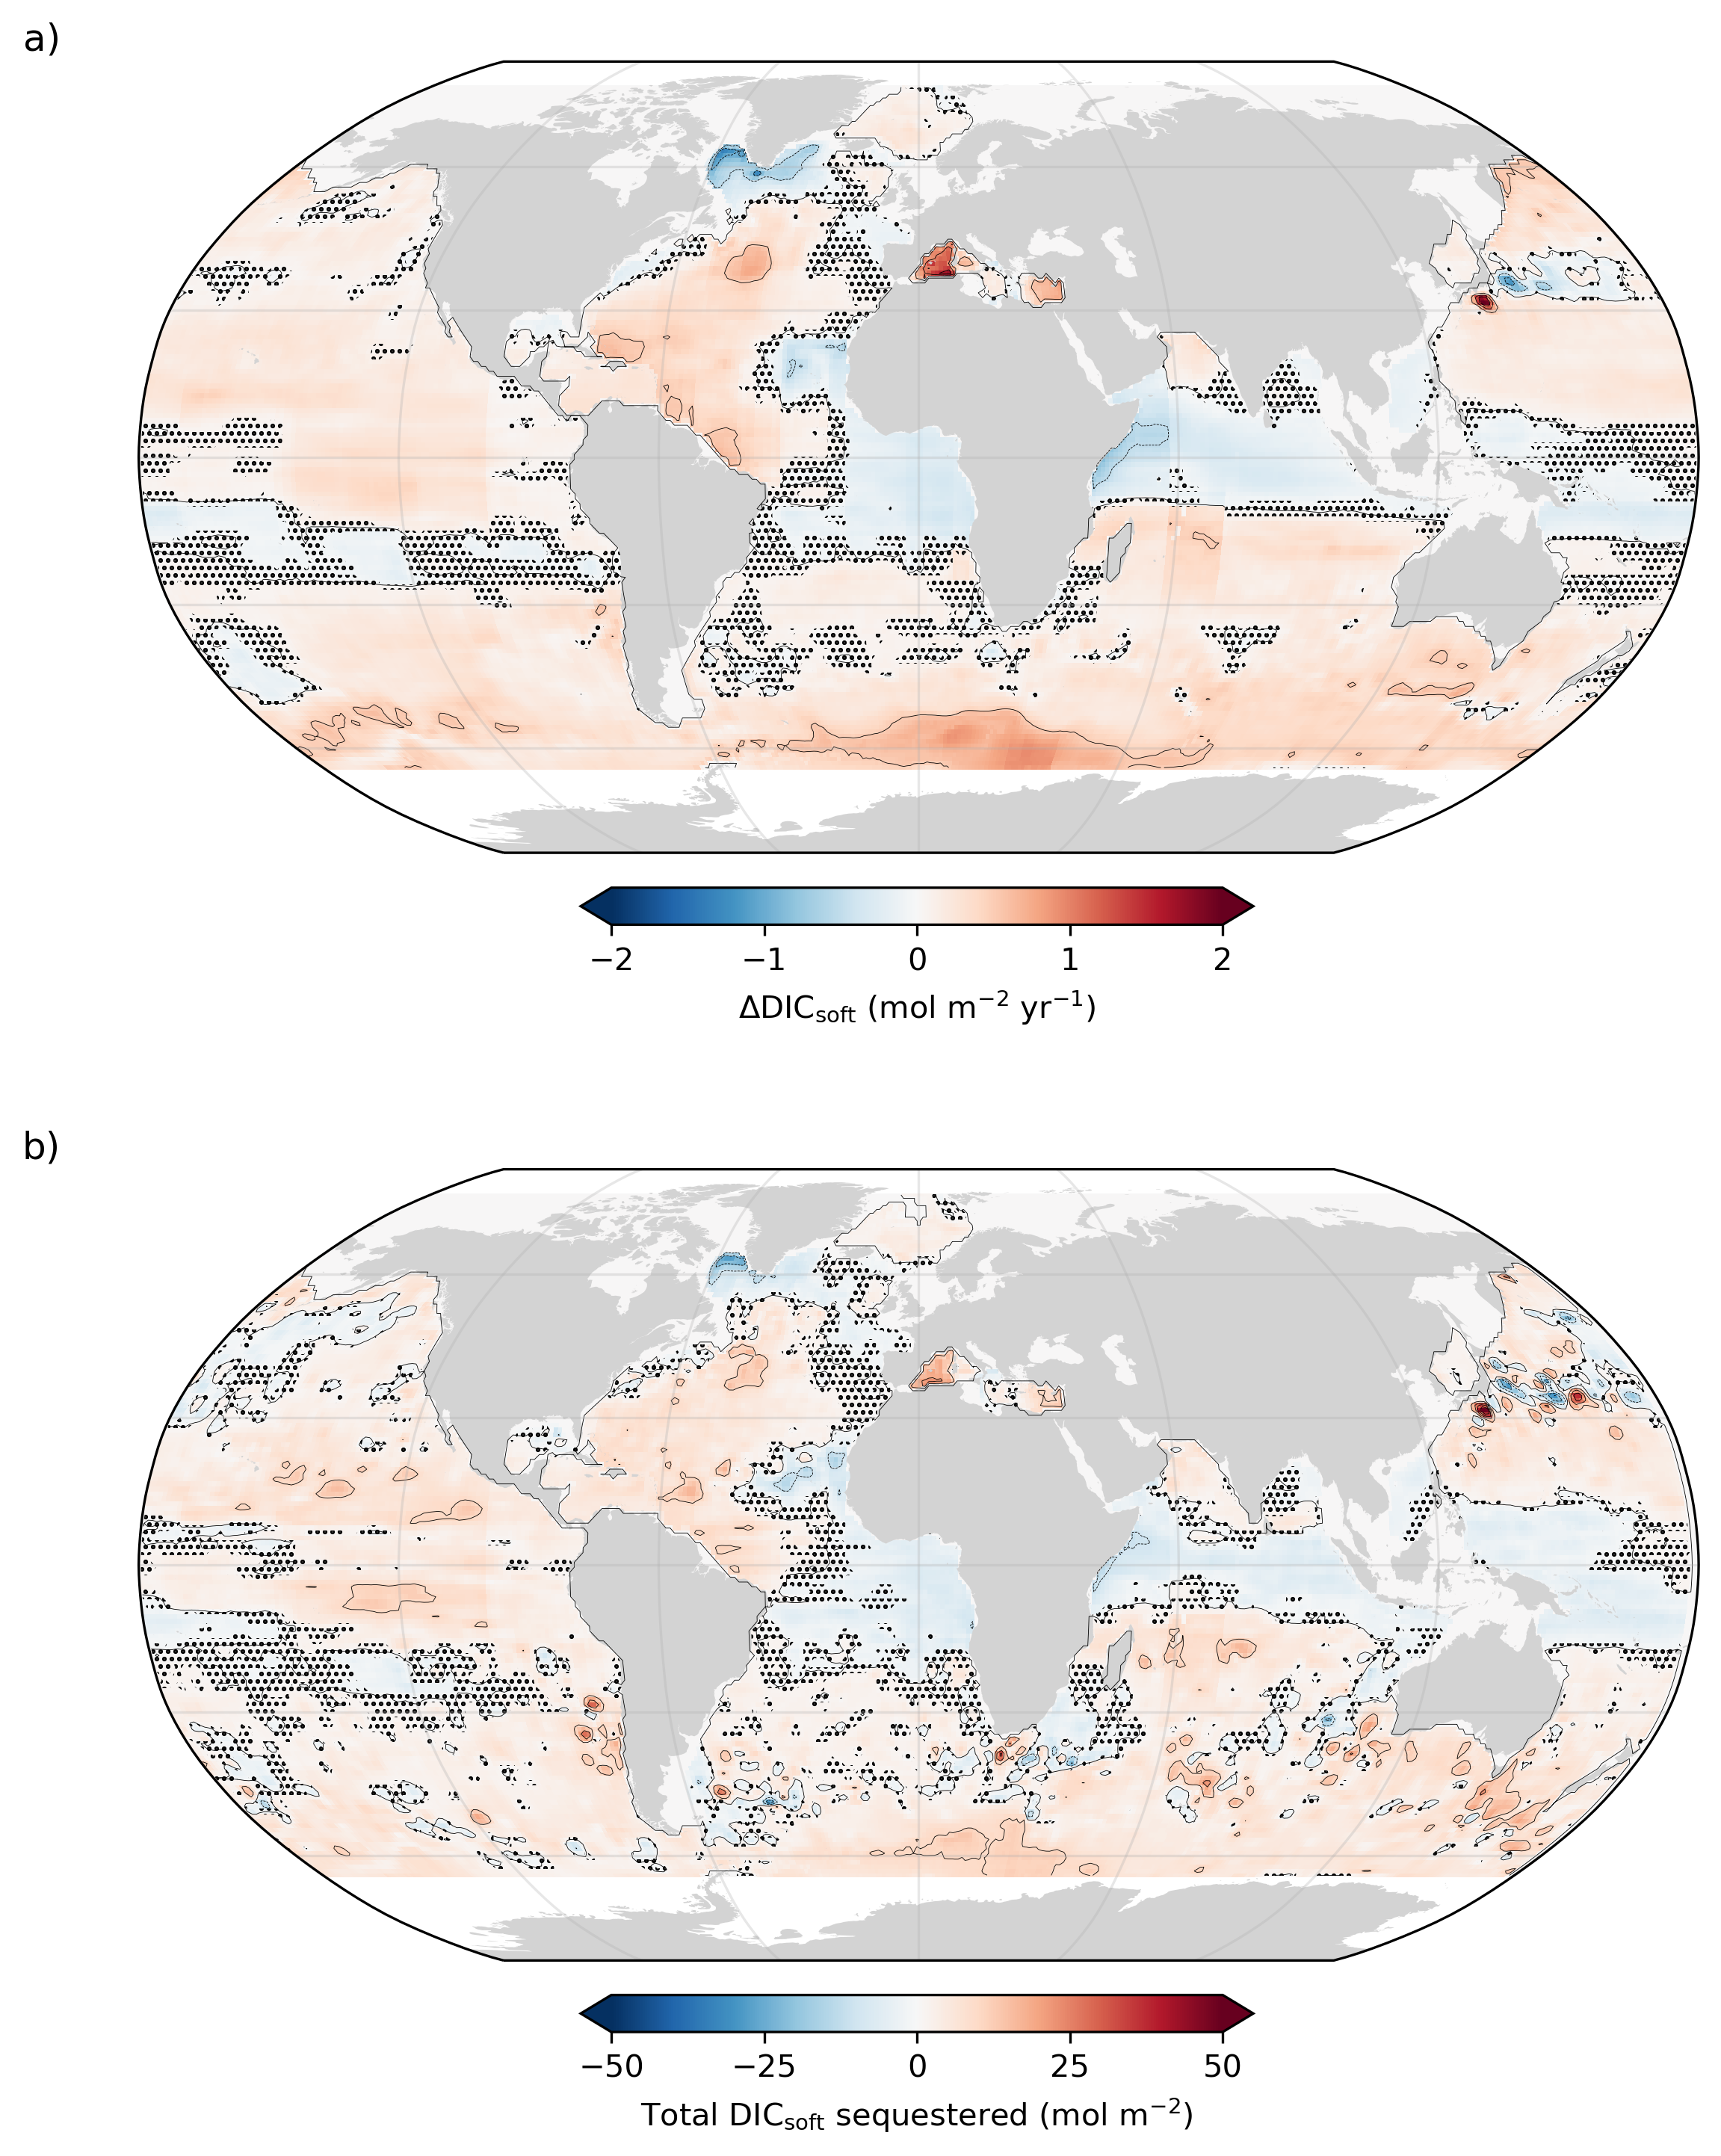

In [9]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import TwoSlopeNorm

# Load datasets
dic_nat_total_change = xr.open_dataset('data/02_DIC_integrated_change_map_monte_carlo_online_pres_diff.nc')
net_DIC_sequestration = xr.load_dataset('data/03_DIC_sequestration_below_winter_MLD_monte_carlo_online_1000_iterations.nc')

# Extract coordinates (lat, lon)
lon = dic_nat_total_change.coords['lon'].values
lat = dic_nat_total_change.coords['lat'].values
lon_2d, lat_2d = np.meshgrid(lon, lat)

# Extract data
dic_nat_total_change_data = dic_nat_total_change["soft_pump_aou_change"].values
net_DIC_sequestration_data = net_DIC_sequestration["DIC_nat_sequestration"].values

# Extract uncertainty data
uncertainty_data_1 = dic_nat_total_change["soft_pump_aou_change_uncertainty"].values
uncertainty_data_2 = net_DIC_sequestration["DIC_nat_sequestration_uncertainty"].values

# Compute relative uncertainty (%)
relative_uncertainty_1 = (uncertainty_data_1 / np.abs(dic_nat_total_change_data)) * 100
relative_uncertainty_1[np.isnan(relative_uncertainty_1)] = 0  # Handle division by zero cases

relative_uncertainty_2 = (uncertainty_data_2 / np.abs(net_DIC_sequestration_data)) * 100
relative_uncertainty_2[np.isnan(relative_uncertainty_2)] = 0

# Define high uncertainty threshold (90th percentile)
threshold_1 = np.percentile(relative_uncertainty_1, 90)
high_uncertainty_mask_1 = relative_uncertainty_1 > threshold_1  # Boolean mask

threshold_2 = np.percentile(relative_uncertainty_2, 90)
high_uncertainty_mask_2 = relative_uncertainty_2 > threshold_2  # Boolean mask

# Create figure
fig = plt.figure(figsize=(15, 11), dpi=300)

# --- First subplot: dic_nat_total_change ---
ax1 = fig.add_subplot(2, 1, 1, projection=ccrs.Robinson())
ax1.set_global()

# Add land feature
land_feature = cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='none', facecolor='lightgrey')
ax1.add_feature(land_feature)

# Add gridlines
ax1.gridlines(draw_labels=False, alpha=0.3)

# Add subplot label
ax1.text(-0.05, 1.05, 'a)', transform=ax1.transAxes, fontsize=12, va='top', ha='right')

# Plot ΔDICnat data
norm1 = TwoSlopeNorm(vcenter=0, vmin=-2, vmax=2)
im1 = ax1.pcolormesh(lon_2d, lat_2d, dic_nat_total_change_data, transform=ccrs.PlateCarree(), cmap='RdBu_r', norm=norm1)

# Add uncertainty hatching
ax1.contourf(lon_2d, lat_2d, high_uncertainty_mask_1, levels=[0.5, 1], colors='xkcd:pale grey', hatches=['.....'], alpha=0.001, transform=ccrs.PlateCarree())

# Add contour lines
levels = np.arange(-2, 2, 0.5)
ax1.contour(lon_2d, lat_2d, dic_nat_total_change_data, levels=levels, colors='black', linewidths=0.2, transform=ccrs.PlateCarree())

# Add colorbar
cbar_ax1 = fig.add_axes([0.412, 0.53, 0.2, 0.015])
cbar1 = fig.colorbar(im1, cax=cbar_ax1, orientation='horizontal', extend='both')
cbar1.set_label(r'$\Delta$DIC$_{\mathrm{soft}}$ (mol m$^{-2}$ yr$^{-1}$)')

# --- Second subplot: net_DIC_sequestration ---
ax2 = fig.add_subplot(2, 1, 2, projection=ccrs.Robinson())
ax2.set_global()

# Add land features
ax2.add_feature(land_feature)

# Add gridlines
ax2.gridlines(draw_labels=False, alpha=0.3)

# Add subplot label
ax2.text(-0.05, 1.05, 'b)', transform=ax2.transAxes, fontsize=12, va='top', ha='right')

# Plot data
norm2 = mcolors.TwoSlopeNorm(vmin=-50, vcenter=0, vmax=50)
im2 = ax2.pcolormesh(lon_2d, lat_2d, net_DIC_sequestration_data, transform=ccrs.PlateCarree(), cmap='RdBu_r', norm=norm2)

# Add uncertainty hatching
ax2.contourf(lon_2d, lat_2d, high_uncertainty_mask_2, levels=[0.5, 1], colors='xkcd:pale grey', hatches=['.....'], alpha=0.001, transform=ccrs.PlateCarree())

# Add contour lines
levels = np.arange(-50, 50, 10)
ax2.contour(lon_2d, lat_2d, net_DIC_sequestration_data, levels=levels, colors='black', linewidths=0.2, transform=ccrs.PlateCarree())

# Add colorbar
cbar_ax2 = fig.add_axes([0.412, 0.081, 0.2, 0.015])
cbar2 = fig.colorbar(im2, cax=cbar_ax2, orientation='horizontal', extend='both')
cbar2.set_label(r'Total DIC$_{\mathrm{soft}}$ sequestered (mol m$^{-2}$)')
cbar2.set_ticks([50, 25, 0, -25, -50])

# Adjust layout
plt.subplots_adjust(hspace=0.4)

# Save figure
fig.savefig('figs/Figure2_with_uncertainty.png', bbox_inches='tight', dpi=300)
plt.show()

**____________________________________________________________________________________________________________________________**


## Figure 4
### Rate of change in sequestration depth over time

In [81]:
# Load dataset
dic_nat_new_seq = xr.load_dataset("data/04_DIC_sequestration_50_depth.nc")


In [84]:
dic_nat_new_seq.DIC_50_depth_uncertainty

<xarray.DataArray 'DIC_50_depth_uncertainty' (time: 228, lat: 20, lon: 20)> Size: 730kB
array([[[ 0.        ,  6.        ,  9.16515139, ...,  9.79795897,
         13.26649916, 12.80624847],
        [ 6.        ,  6.        ,  9.16515139, ...,  6.        ,
          6.        ,  8.94427191],
        [10.        ,  8.        ,  9.16515139, ...,  0.        ,
          0.        ,  6.        ],
        ...,
        [ 0.        ,  0.        ,  6.        , ...,  6.        ,
          6.        ,  6.        ],
        [ 6.        ,  8.        , 10.77032961, ...,  6.        ,
          8.        ,  6.        ],
        [ 9.16515139,  9.16515139,  0.        , ...,  6.        ,
          0.        ,  0.        ]],

       [[ 0.        ,  8.        ,  8.        , ..., 10.        ,
          9.16515139, 10.77032961],
        [ 0.        ,  8.        ,  9.79795897, ...,  8.        ,
         12.64911064,  6.        ],
        [ 9.79795897,  9.79795897,  9.79795897, ...,  6.        ,
          6.        ,  0.        ],
...
        [ 6.        ,  6.        ,  9.16515139, ...,  0.        ,
          6.        ,  6.        ],
        [ 8.        ,  8.        ,  6.        , ...,  9.79795897,
          9.79795897, 10.        ],
        [10.        ,  6.        ,  9.16515139, ...,  6.        ,
          9.16515139,  6.        ]],

       [[ 6.        ,  8.        , 10.        , ..., 10.        ,
          9.79795897,  8.        ],
        [ 8.        , 10.        ,  9.16515139, ...,  8.94427191,
          8.        ,  0.        ],
        [ 8.        ,  6.        ,  0.        , ...,  6.        ,
          8.        ,  9.16515139],
        ...,
        [ 8.        ,  9.16515139,  6.        , ...,  8.        ,
          8.        ,  9.79795897],
        [ 8.        , 10.        ,  9.16515139, ...,  9.79795897,
          0.        ,  9.79795897],
        [ 8.        ,  9.16515139,  8.        , ..., 10.        ,
         10.        ,  8.        ]]])
Coordinates:
  * lon      (lon) float32 80B -179.5 -178.5 -177.5 ... -162.5 -161.5 -160.5
  * lat      (lat) float32 80B -64.5 -63.5 -62.5 -61.5 ... -47.5 -46.5 -45.5
  * time     (time) datetime64[ns] 2kB 2004-01-15 2004-02-15 ... 2022-12-15

ValueError: too many values to unpack (expected 2)

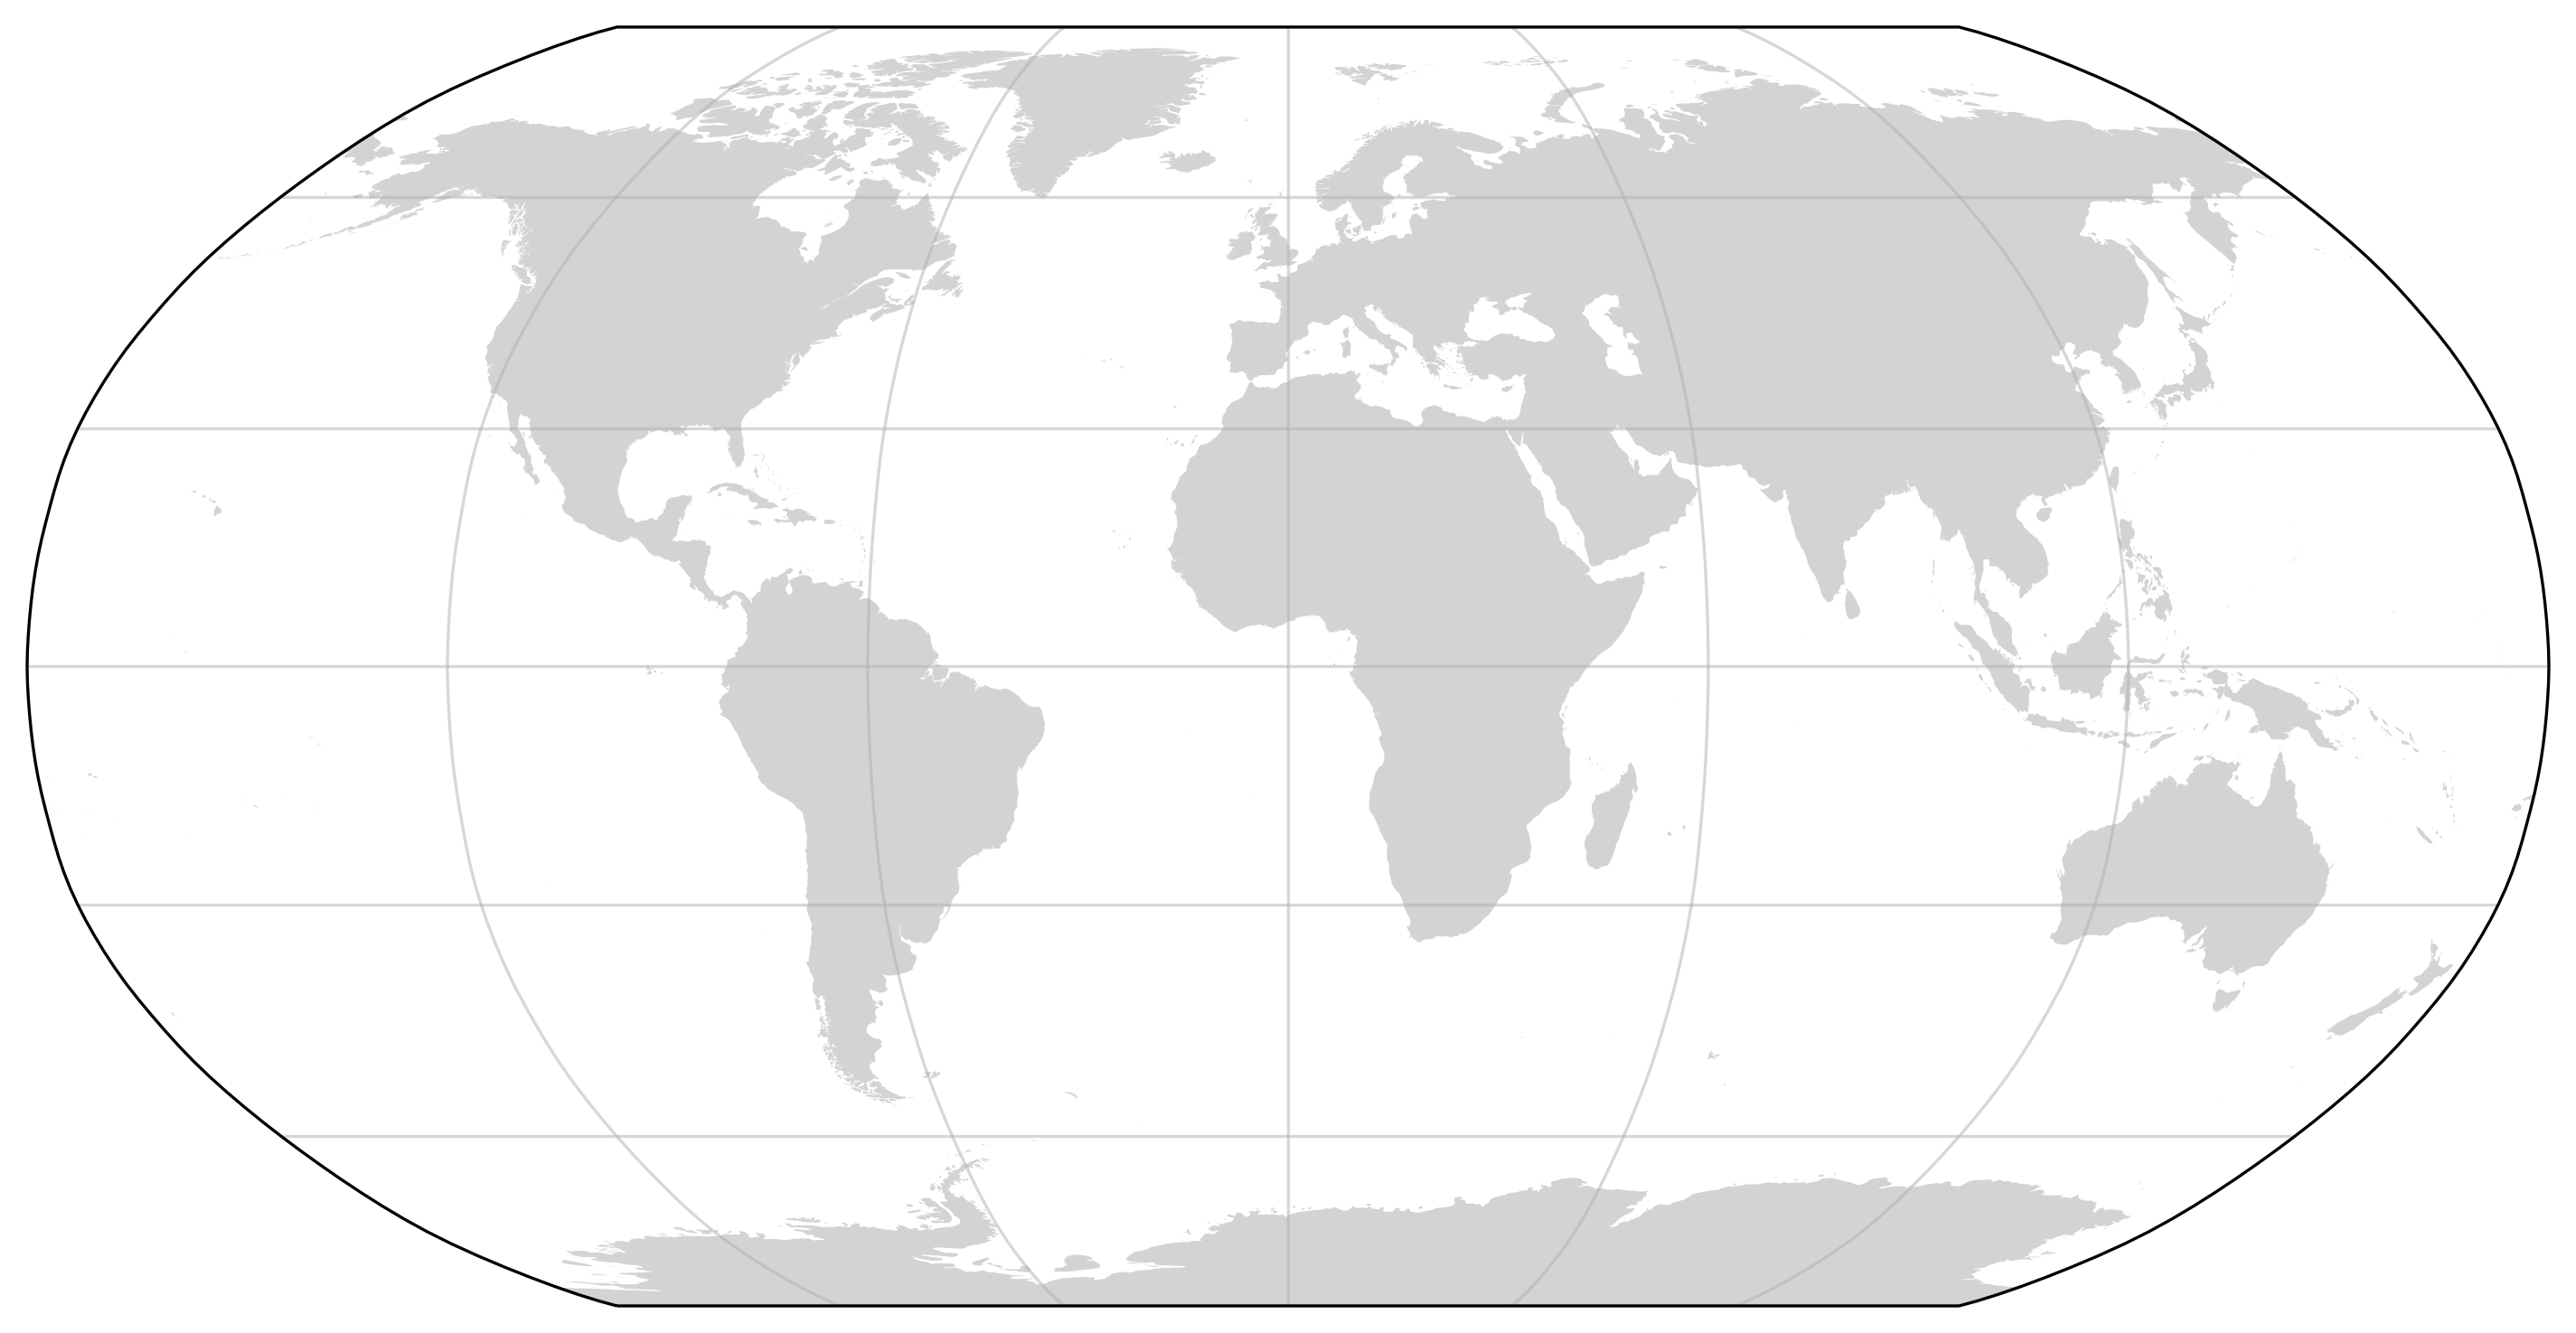

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import TwoSlopeNorm
import xarray as xr

# Load dataset
dic_nat_new_seq = xr.load_dataset("data/04_DIC_sequestration_50_depth.nc")

# Extract coordinates
lon = dic_nat_new_seq.coords['lon'].values  # Shape (360,)
lat = dic_nat_new_seq.coords['lat'].values  # Shape (145,)
lon_2d, lat_2d = np.meshgrid(lon, lat)  # Shapes: (145, 360)

# Extract data and uncertainty
dic_nat_new_seq_data = dic_nat_new_seq['DIC_50_depth'].values  # Shape (145, 360)
uncertainty_data = dic_nat_new_seq['DIC_50_depth_uncertainty'].values  # Shape (145, 360)

# Compute relative uncertainty (%)
eps = np.finfo(float).eps  # Smallest positive float number to avoid division by zero
relative_uncertainty = (uncertainty_data / (np.abs(dic_nat_new_seq_data) + eps)) * 100
relative_uncertainty[np.isnan(relative_uncertainty)] = 0  # Handle NaNs

# Define high uncertainty threshold (90th percentile)
threshold = np.percentile(relative_uncertainty, 90)
high_uncertainty_mask = relative_uncertainty > threshold  # Boolean mask

# Normalization parameters
vmin = dic_nat_new_seq_data.min()
vmax = dic_nat_new_seq_data.max()

# Create figure
fig = plt.figure(figsize=(12, 8), dpi=300)
ax1 = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax1.set_global()

# Add land feature
land_feature = cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='none', facecolor='lightgrey')
ax1.add_feature(land_feature)

# Gridlines
gl1 = ax1.gridlines(draw_labels=False, alpha=0.5)

# Plot ΔDICnat data
norm1 = TwoSlopeNorm(vcenter=0, vmin=-50, vmax=50)
im1 = ax1.pcolormesh(lon, lat, dic_nat_new_seq_data, transform=ccrs.PlateCarree(), cmap='RdBu_r', norm=norm1)

# Add high uncertainty hatching
ax1.contourf(lon_2d, lat_2d, high_uncertainty_mask, levels=[0.5, 1], colors='xkcd:grey', hatches=['.....'], alpha=0.001, transform=ccrs.PlateCarree())

# Contour lines
levels = np.arange(-50, 50, 10)
contour1 = ax1.contour(lon_2d, lat_2d, dic_nat_new_seq_data, levels=levels, colors='black', linewidths=0.3, transform=ccrs.PlateCarree())

# Remove title
ax1.set_title("")

# Colorbar
cbar_ax1 = fig.add_axes([0.362, 0.15, 0.3, 0.015])  # Adjust position if needed
cbar1 = fig.colorbar(im1, cax=cbar_ax1, orientation='horizontal', extend='both')
cbar1.set_label(r'Total DIC$_{\mathrm{soft}}$ sequestered (mol m$^{-2}$)')

# Save figure
fig.savefig('figs/Figure4_with_uncertainty.png', bbox_inches='tight', dpi=300)
plt.show()
    